**Hacemos los Import necesarios con los paquetes que utilizaremos en el Problema.**

In [ ]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
%matplotlib inline

**Leemos el archivo csv desde google drive y lo asignamos mediante Pandas a la variable dataframe. Mediante el método dataframe.head() vemos en pantalla los 5 primeros registros.**

**dataframe = pd.read_csv(r"/content/drive/MyDrive/MyDrive/datasetshopping.csv")
dataframe.head()**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
dataframe = pd.read_csv(r"/content/drive/MyDrive/datasetshopping.csv")
dataframe.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


**Ahora usamos el método dataframe.describe() que nos dará algo de información estadística básica de nuestro set de datos. La Media, el desvío estándar, valores mínimo y máximo de cada característica.**

In [ ]:
dataframe.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000


# correlaciones bivariadas para todas nuestras columnas
Algunos aspectos destacados de los patrones observados en el mapa de calor de correlación a continuación es que los ingresos están muy positivamente correlacionados con la función de número promedio de valores de página (r = 0,5), mientras que están inversamente correlacionados con las tasas de rebote y salida. Además, como era de esperar, de las páginas administrativas, informativas y relacionadas con productos, la que genera mayores ingresos es la cantidad de páginas relacionadas con productos visitadas por el usuario (r = 0,2).

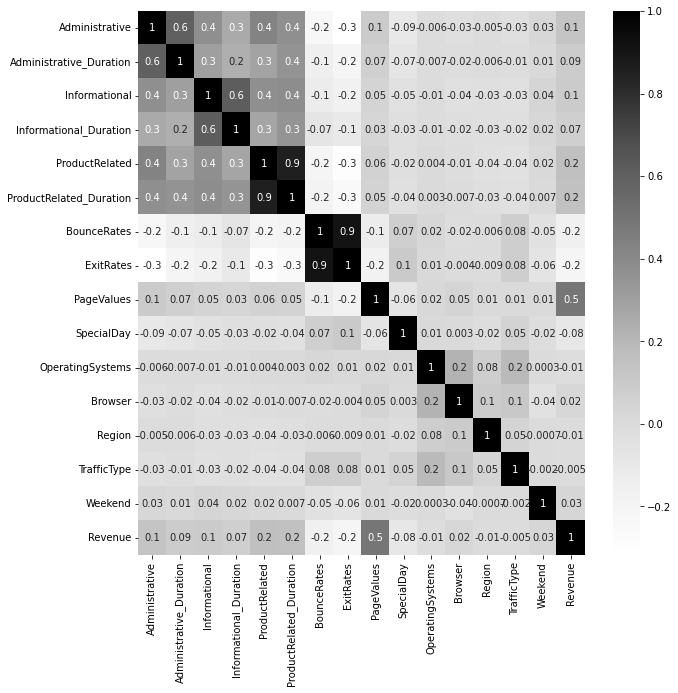

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,10))
sns.heatmap(dataframe.corr(),annot=True,fmt='.1g',cmap='Greys')

**Luego analizaremos cuantos resultados tenemos de cada tipo usando la función groupby y vemos que tenemos 10422 usuarios “False”, es decir los que no realizaron una compra y 1908 usuarios "True" que realizaron una compra.**

In [ ]:
print(dataframe.groupby('Revenue').size())

Revenue
0    10422
1     1908
dtype: int64


#mostrando cuantos compraron o no en  histograma simple

Text(0, 0.5, 'cantidad')

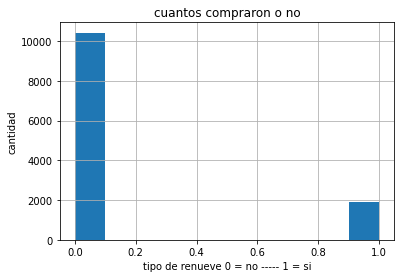

In [ ]:
dataframe.Revenue.hist()
plt.title('cuantos compraron o no')
plt.xlabel('tipo de renueve 0 = no ----- 1 = si')
plt.ylabel('cantidad')

#Grafico de nuestra variable revenue y la cantidad de resultados

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.89, 2100, '1908')

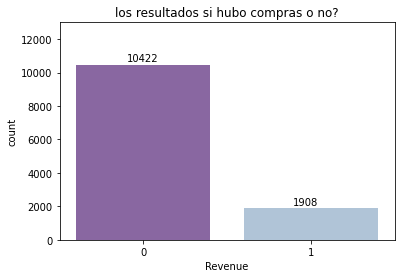

In [ ]:
revenue_plot = sns.countplot(dataframe['Revenue'],  palette = "BuPu_r").set(title='los resultados si hubo compras o no?')
plt.ylim(0,13000)
plt.text(x=-.100, y=10700 ,s=dataframe['Revenue'].value_counts()[0])
plt.text(x=.890, y=2100, s=dataframe['Revenue'].value_counts()[1])

#calcula las características 'Region','Month','Weekend','SpecialDay' contra los ingresos (revenue)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

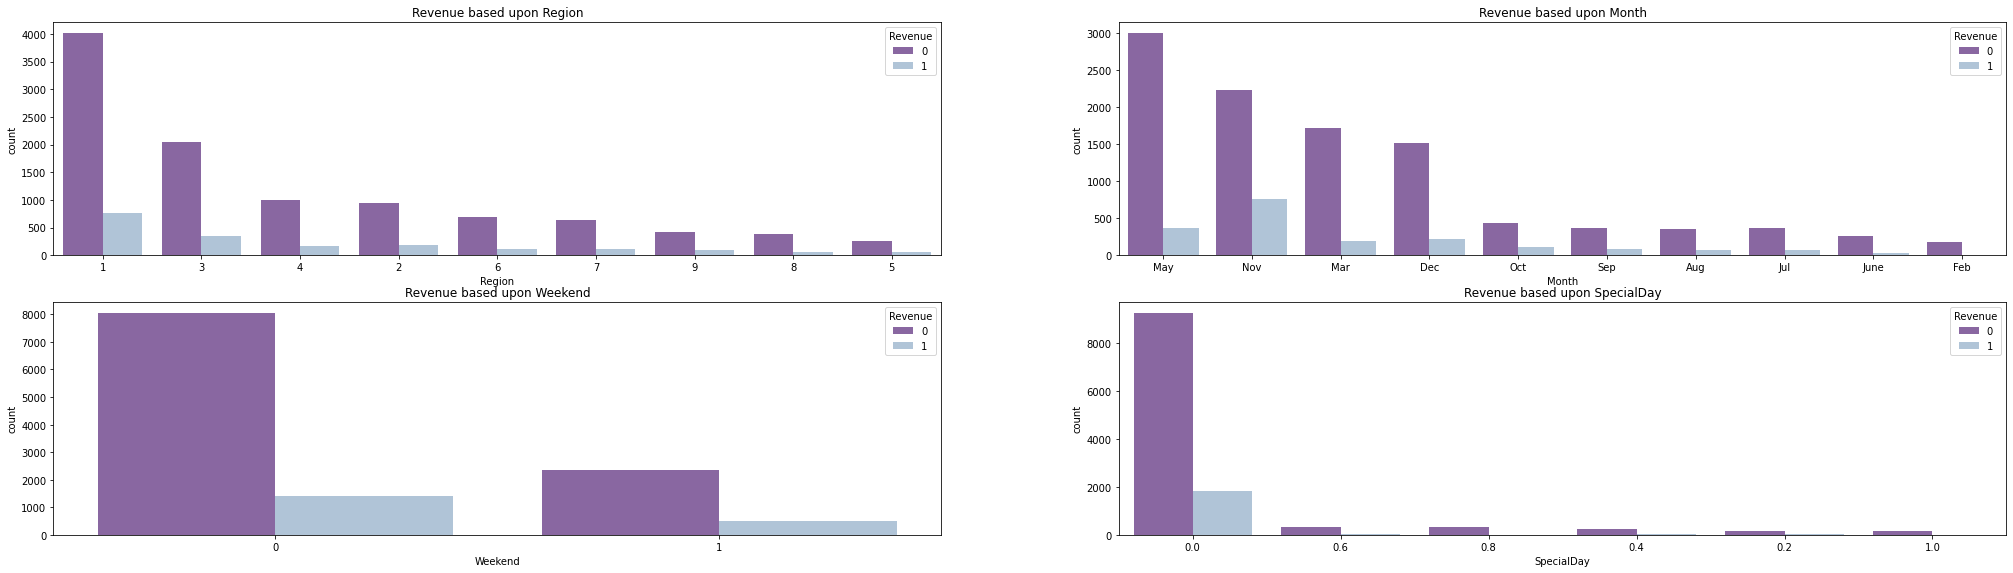

In [ ]:
features =['Region','Month','Weekend','SpecialDay']  
plt.figure(figsize=(35,30))
number = 0
for feature in features:
    number = number + 1
    ax = plt.subplot(6, 2, number,adjustable='datalim')
    sns.countplot(dataframe[feature],hue=dataframe['Revenue'],
                  order = dataframe[feature].value_counts(ascending=False).index,  palette = "BuPu_r")
    ax.set_title('Revenue based upon'+ " " + feature)
    #plt.tight_layout()

#caracteristicas con los atributos'OperatingSystems','Browser','VisitorType', 'TrafficType' como afectan los ingresos (revenue)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

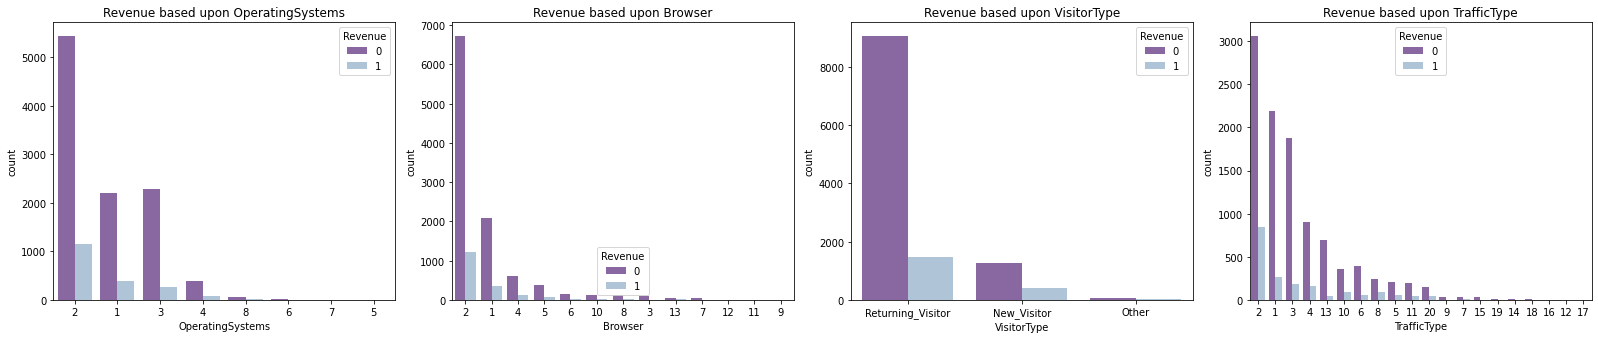

In [ ]:
features=['OperatingSystems','Browser','VisitorType', 'TrafficType']    
plt.figure(figsize=(50,80))
number = 0
for feature in features:
    number = number + 1
    ax = plt.subplot(18, 9, number,adjustable='datalim')
    sns.countplot(dataframe[feature],hue=dataframe['Revenue'],
                  order = dataframe[feature].value_counts(ascending=False).index,  palette = "BuPu_r")
    ax.set_title('Revenue based upon'+ " " + feature)
    plt.tight_layout()

# **Creamos el Modelo de Regresión Logística**
**Ahora cargamos las variables de las 4 columnas de entrada en X excluyendo la columna “Revenue” con el método drop(). En cambio agregamos la columna “Revenue” en la variable y. Ejecutamos X.shape para comprobar la dimensión de nuestra matriz con datos de entrada de 170 registros por 4 columnas.**

In [ ]:
X = np.array(dataframe.drop(['Revenue','ProductRelated',	'ProductRelated_Duration',	'BounceRates',	'ExitRates',	'PageValues',	'SpecialDay',	'Month',	'OperatingSystems',	'Browser',	'Region',	'TrafficType',	'VisitorType',	'Weekend'	],axis = 1))
y = np.array(dataframe['Revenue'])
X.shape

(12330, 4)

**Y creamos nuestro modelo y hacemos que se ajuste (fit) a nuestro conjunto de entradas X y salidas ‘y’.**

In [ ]:
model = linear_model.LogisticRegression()
model.fit(X,y)

LogisticRegression()

**Una vez compilado nuestro modelo, le hacemos clasificar todo nuestro conjunto de entradas X utilizando el método “predict(X)” y revisamos algunas de sus salidas y vemos que coincide con las salidas reales de nuestro archivo csv.**

In [ ]:
predictions = model.predict(X)
print(predictions[0:5])

[0 0 0 0 0]


In [ ]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

Y confirmamos cuan bueno fue nuestro modelo utilizando model.score() que nos devuelve la precisión media de las predicciones, en nuestro caso del 84%.

In [ ]:
model.score(X,y)

0.8442011354420114

#**Validación de nuestro modelo** 
**Subdividimos nuestro conjunto de datos de entrada en un set de entrenamiento y otro para validar el modelo (que no se utiliza durante el entrenamiento y por lo tanto la máquina desconoce). Esto evitará problemas en los que nuestro algoritmo pueda fallar por “sobregeneralizar” el conocimiento.**


**Para ello, subdividimos nuestros datos de entrada en forma aleatoria (mezclados) utilizando 80% de registros para entrenamiento y 20% para validar.**

In [ ]:
validation_size = 0.20
seed = 42
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

**Volvemos a compilar nuestro modelo de Regresión Logística pero esta vez sólo con 80% de los datos de entrada y calculamos el nuevo scoring que ahora nos da 84%.**

In [ ]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle = True)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.847425 (0.007337)


**Y ahora hacemos las predicciones -en realidad clasificación- utilizando nuestro “cross validation set”, es decir del subconjunto que habíamos apartado. En este caso vemos que los aciertos fueron del 83% pero hay que tener en cuenta que el tamaño de datos era pequeño.**

In [ ]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.8321167883211679


**Finalmente vemos en pantalla la “matriz de confusión” donde muestra cuantos resultados equivocados tuvo de cada clase (los que no están en la diagonal), por ejemplo predijo que 2 usuarios que no realizaron una compra como si la hubieran realizado.**

In [ ]:
print(confusion_matrix(Y_validation, predictions))

[[2050    5]
 [ 409    2]]


**También podemos ver el reporte de clasificación con nuestro conjunto de Validación. En nuestro caso vemos que se utilizaron como “soporte” 2055 "No Compradores" y 411 "Compradores" de un total de 1908. Podemos ver la precisión con que se acertaron cada una de las clases. La valoración que de aqui nos conviene tener en cuenta es la de F1-score, que tiene en cuenta la precisión y recall. El promedio de F1 es de 83% lo cual no está nada mal.**

In [ ]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2055
           1       0.29      0.00      0.01       411

    accuracy                           0.83      2466
   macro avg       0.56      0.50      0.46      2466
weighted avg       0.74      0.83      0.76      2466

